In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from scipy.stats import randint

# Creating a list of colors based on the "tab10" colormap.
# I like the color set in the "tab10" colormap.
cmap = plt.colormaps["tab10"]
colors = [cmap(i) for i in range(21)]

# Different Marker for Scatter plot
markers = ['o', 's', '*', 'x', '^', 'v', '<', '>']  # Different markers for different classes

In [18]:
from utils.notebook_config import *
# Download latest version
file_path = "dataset/synthetic_coffee_health_10000.csv"

# Load the latest version
data = pd.read_csv(file_path)

print(data.head())

train_df, val_df = train_test_split(data, test_size=0.3, random_state=42)


# Apply label encoding to categorical column
label_encoder = LabelEncoder()
train_df["Gender"] = label_encoder.fit_transform(train_df["Gender"])
val_df["Gender"]   = label_encoder.transform(val_df["Gender"])

train_df["Country"] = label_encoder.fit_transform(train_df["Country"])
val_df["Country"]   = label_encoder.transform(val_df["Country"])

train_df["Sleep_Quality"] = label_encoder.fit_transform(train_df["Sleep_Quality"])
val_df["Sleep_Quality"]   = label_encoder.transform(val_df["Sleep_Quality"])

train_df["Stress_Level"] = label_encoder.fit_transform(train_df["Stress_Level"])
val_df["Stress_Level"]   = label_encoder.transform(val_df["Stress_Level"])

train_df["Health_Issues"] = label_encoder.fit_transform(train_df["Health_Issues"])
val_df["Health_Issues"]   = label_encoder.transform(val_df["Health_Issues"])

print(label_encoder.classes_)

   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2          Fair  22.7          59       Medium                     11.2   
3          Good  24.7          71          Low                      6.6   
4          Fair  24.1          76       Medium                      8.5   

  Health_Issues Occupation  Smoking  Alcohol_Consumption  
0           NaN      Other        0                    0 

/var/folders/rq/sf33k5wx73bcj8m51c786sc80000gn/T/ipykernel_60966/464307858.py:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


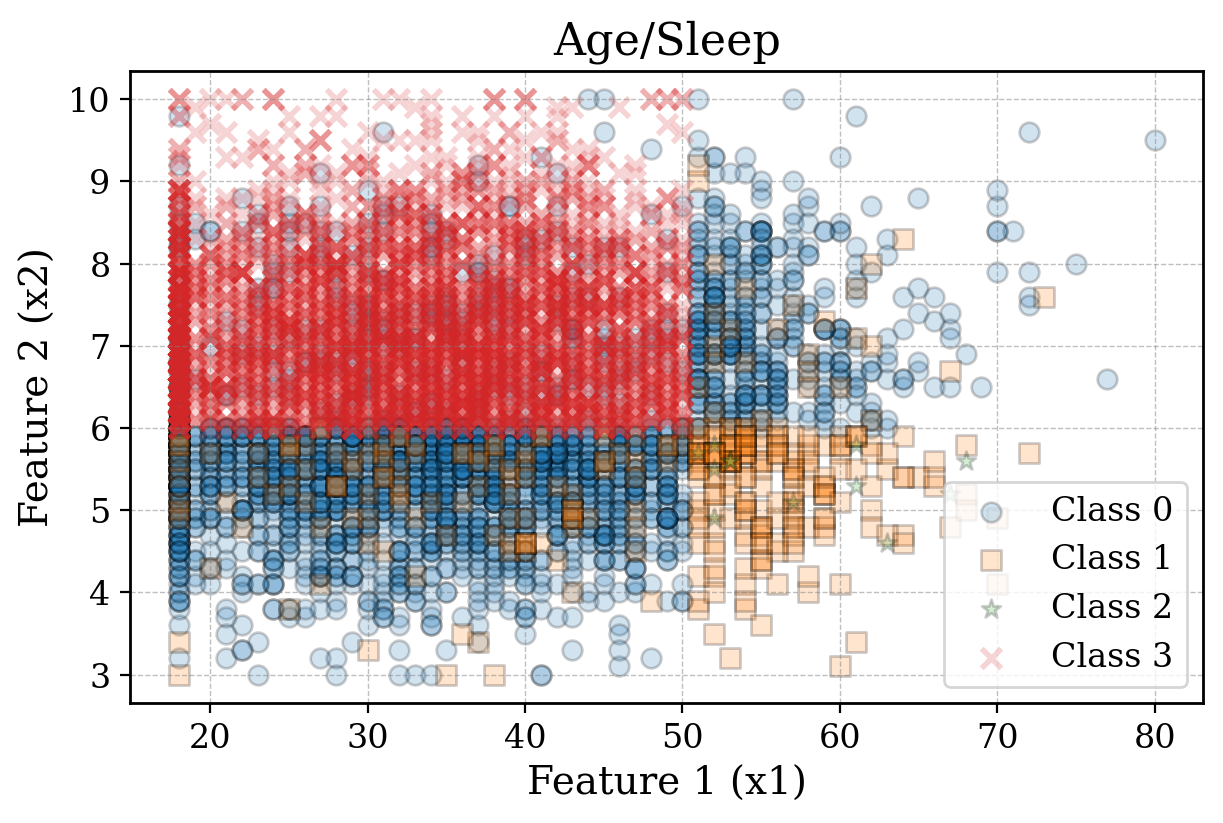

In [7]:
x = train_df[["Age","Sleep_Hours"]].to_numpy()
y = train_df["Health_Issues"].to_numpy()

def visualize_data(x, y, title):
    plt.figure()
    
    classes = np.unique(y) # Get unique class labels

    for i, label in enumerate(classes):
        plt.scatter(
            x[y == label, 0],
            x[y == label, 1],
            marker=markers[i % len(markers)],
            color=colors[i], edgecolor="k" ,
            s=50, alpha=0.2, 
            label=f"Class {label}")

    plt.xlabel("Feature 1 (x1)")
    plt.ylabel("Feature 2 (x2)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_data(x,y,"Age/Sleep")

In [171]:
#data = data[["Age","Caffeine_mg","Sleep_Hours","Sleep_Quality","BMI","Heart_Rate","Stress_Level","Health_Issues"]]
data = pd.read_csv(file_path)
data.head()

ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2          Fair  22.7          59       Medium                     11.2   
3          Good  24.7          71          Low                      6.6   
4          Fair  24.1          76       Medium                      8.5   

  Health_Issues Occupation  Smoking  Alcohol_Consumption  
0           NaN      Other        0                    0  
1           NaN    Service        0                    0  
2          Mild     Office        0                    0  
3          Mild      Other        0                    0  
4          Mild    Student        0                    1

In [172]:
#start with the visualization
#smoking and alcohol are boolean
#Gender Country and Sleep quality must be converted to numerals
"""Country could be hard to convert maybe we just sort them by GDP and give them descending numbers based on that or we use an index measuring health care. Coffee intake and estimated caffeine is redundent """
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

ID           Age  Coffee_Intake   Caffeine_mg   Sleep_Hours  \
count  10000.00000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    5000.50000     34.949100       2.509230    238.411010      6.636220   
std     2886.89568     11.160939       1.450248    137.748815      1.222055   
min        1.00000     18.000000       0.000000      0.000000      3.000000   
25%     2500.75000     26.000000       1.500000    138.750000      5.800000   
50%     5000.50000     34.000000       2.500000    235.400000      6.600000   
75%     7500.25000     43.000000       3.500000    332.025000      7.500000   
max    10000.00000     80.000000       8.200000    780.300000     10.000000   

                BMI    Heart_Rate  Physical_Activity_Hours      Smoking  \
count  10000.000000  10000.000000              10000.00000  10000.00000   
mean      23.986860     70.617800                  7.48704      0.20040   
std        3.906411      9.822951                  4.31518      0.40032   
min       15.000000     50.000000                  0.00000      0.00000   
25%       21.300000     64.000000                  3.70000      0.00000   
50%       24.000000     71.000000                  7.50000      0.00000   
75%       26.600000     77.000000                 11.20000      0.00000   
max       38.200000    109.000000                 15.00000      1.00000   

       Alcohol_Consumption  
count         10000.000000  
mean              0.300700  
std               0.458585  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000

In [173]:
from IPython.display import display

display(data['Country'].value_counts())
display(data['Gender'].value_counts())
display(data['Sleep_Quality'].value_counts())
display(data['Health_Issues'].value_counts())
display(data['Occupation'].value_counts())

Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Belgium        497
Australia      497
Germany        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64

Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64

Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

Occupation
Office        2073
Other         2038
Student       1968
Healthcare    1964
Service       1957
Name: count, dtype: int64

In [174]:
data[('Country_encoded')], country_categories= pd.factorize(data['Country'])
data['Gender_encoded'], gender_categories = pd.factorize(data['Gender'])
data['Sleep_encoded'], sleep_categories = pd.factorize(data['Sleep_Quality'])
data['Health_encoded'], health_categories = pd.factorize(data['Health_Issues'])
data['Occupation_encoded'], occupation_categories = pd.factorize(data['Occupation'])

/var/folders/rq/sf33k5wx73bcj8m51c786sc80000gn/T/ipykernel_45560/2198168833.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


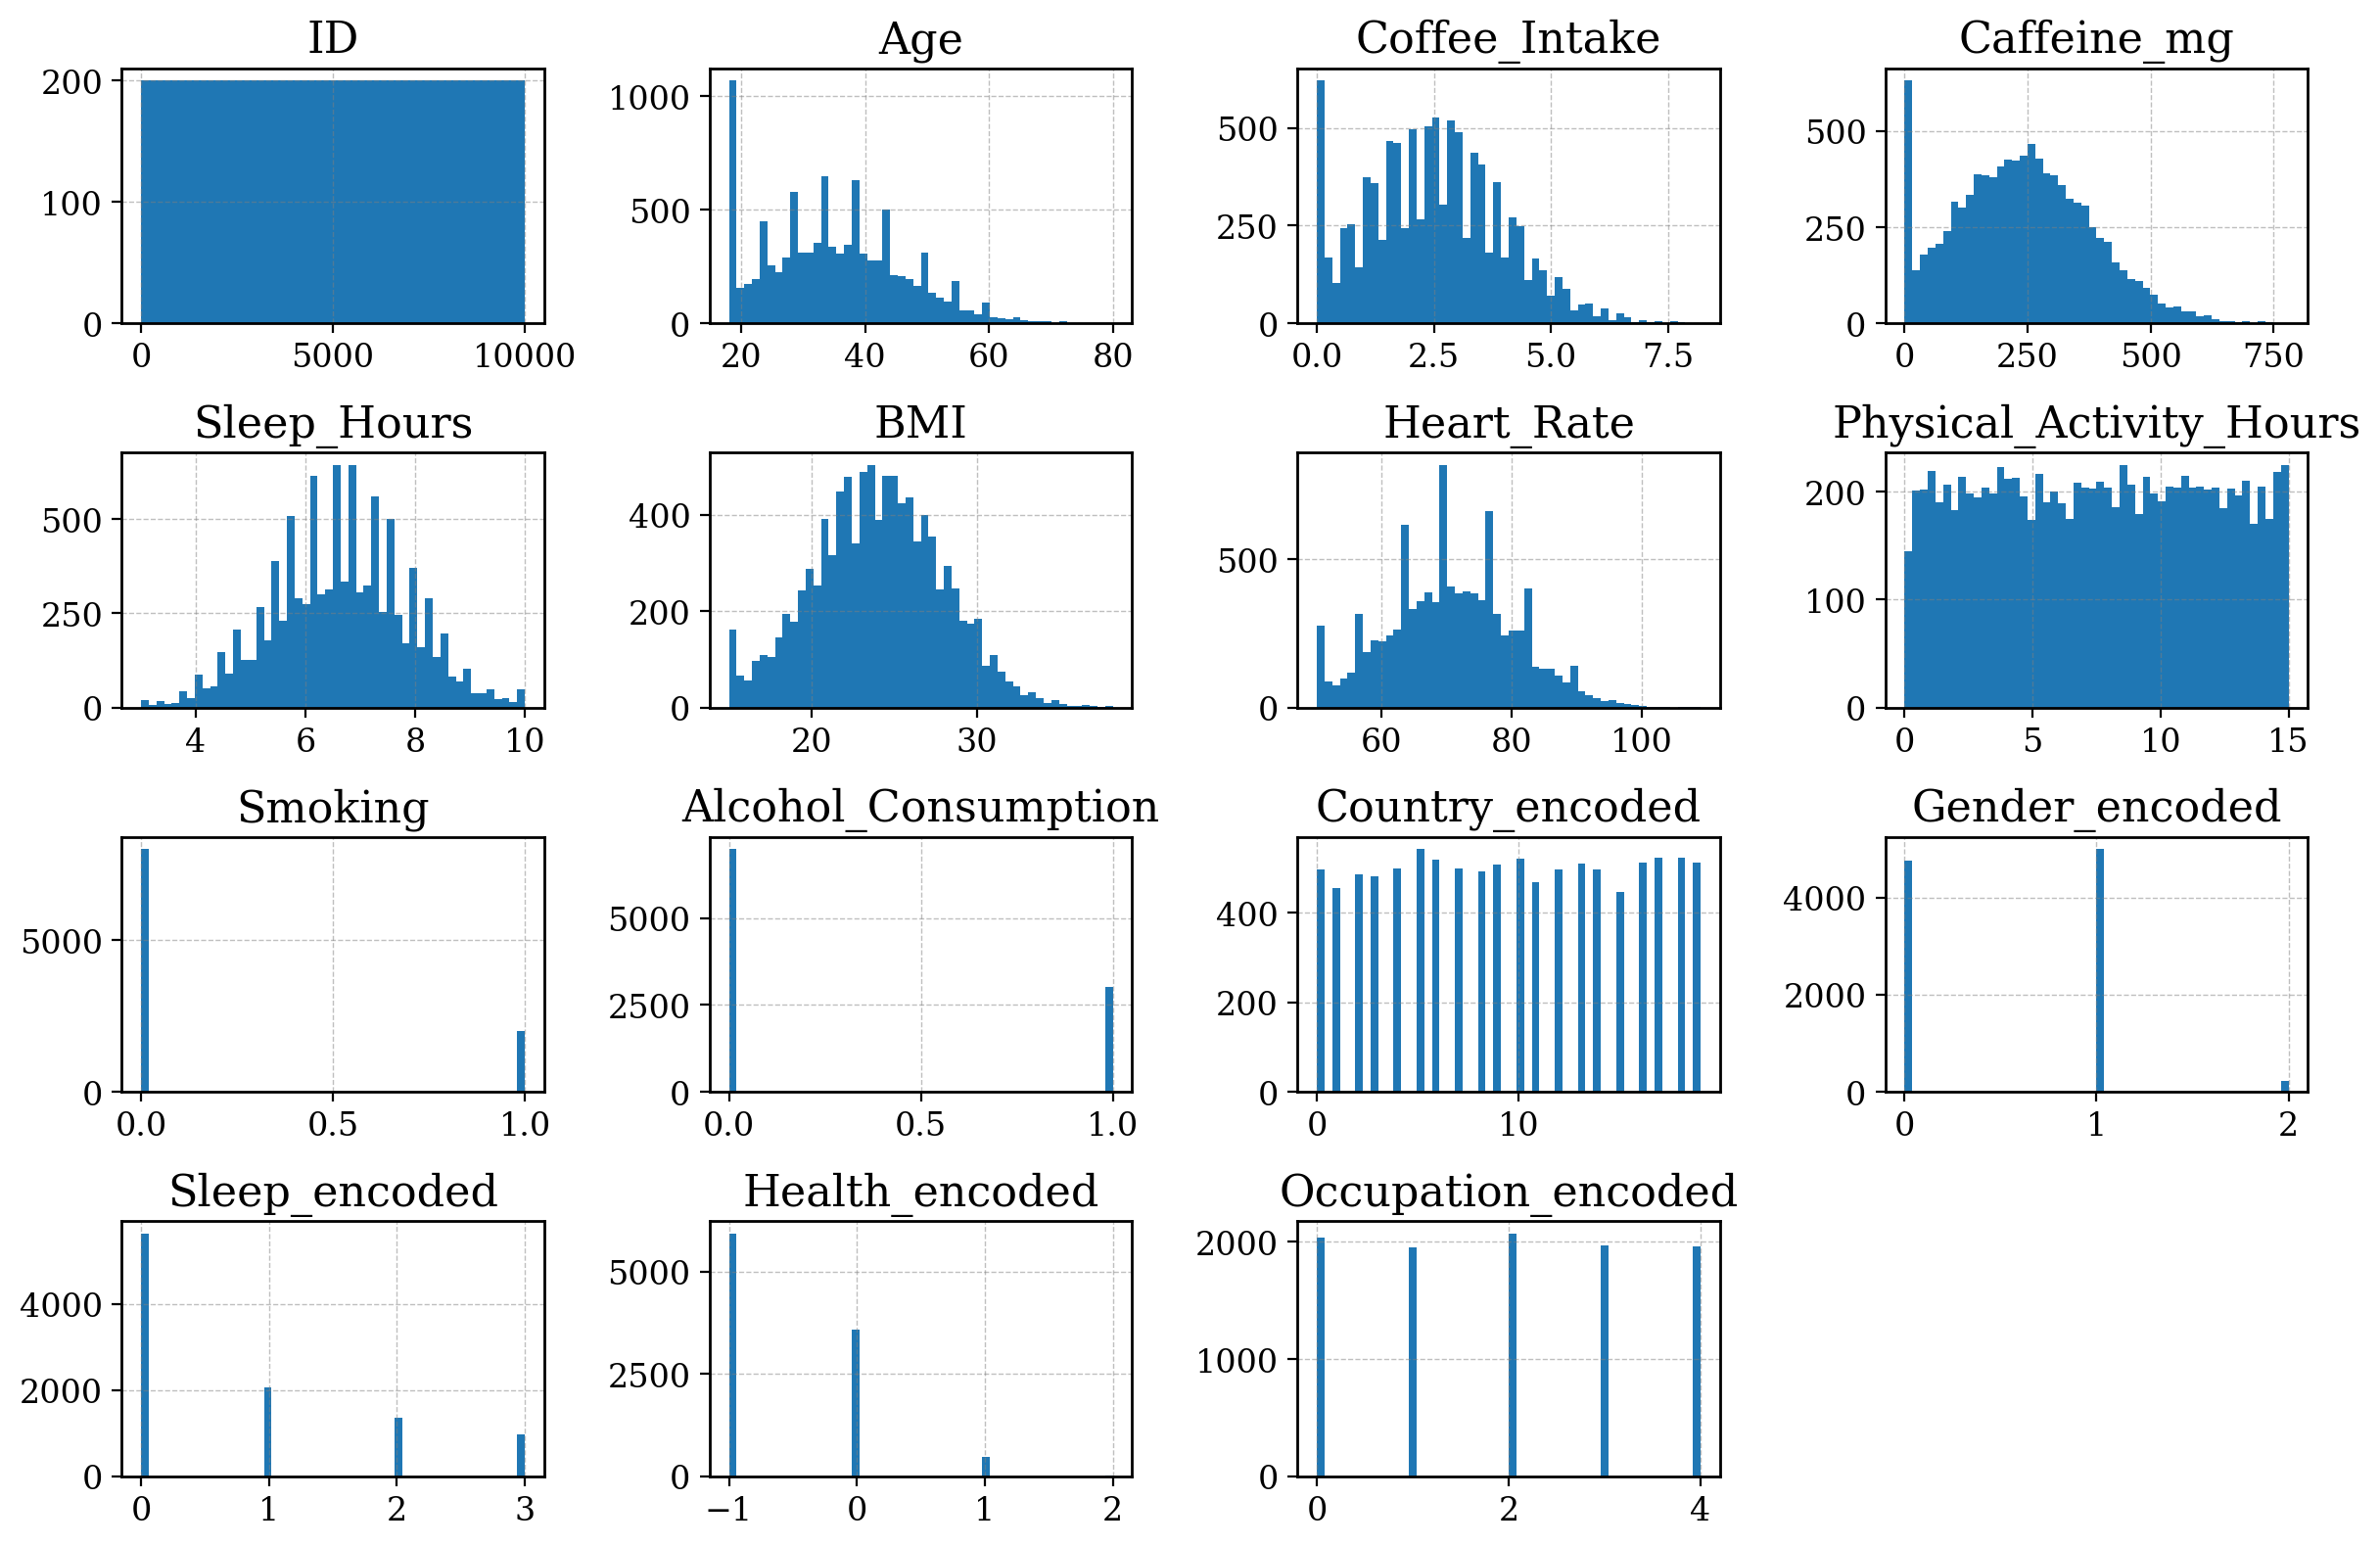

In [175]:
data.hist(bins=50, figsize=(12, 8))
plt.tight_layout()

In [176]:
data.head()

ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate  ... Physical_Activity_Hours  Health_Issues  \
0          Good  24.9          78  ...                    14.5            NaN   
1          Good  20.0          67  ...                    11.0            NaN   
2          Fair  22.7          59  ...                    11.2           Mild   
3          Good  24.7          71  ...                     6.6           Mild   
4          Fair  24.1          76  ...                     8.5           Mild   

  Occupation Smoking  Alcohol_Consumption  Country_encoded  Gender_encoded  \
0      Other       0                    0                0               0   
1    Service       0                    0                0               0   
2     Office       0                    0                1               0   
3      Other       0                    0                0               0   
4    Student       0                    1                2               1   

   Sleep_encoded  Health_encoded  Occupation_encoded  
0              0              -1                   0  
1              0              -1                   1  
2              1               0                   2  
3              0               0                   0  
4              1               0                   3  

[5 rows x 21 columns]

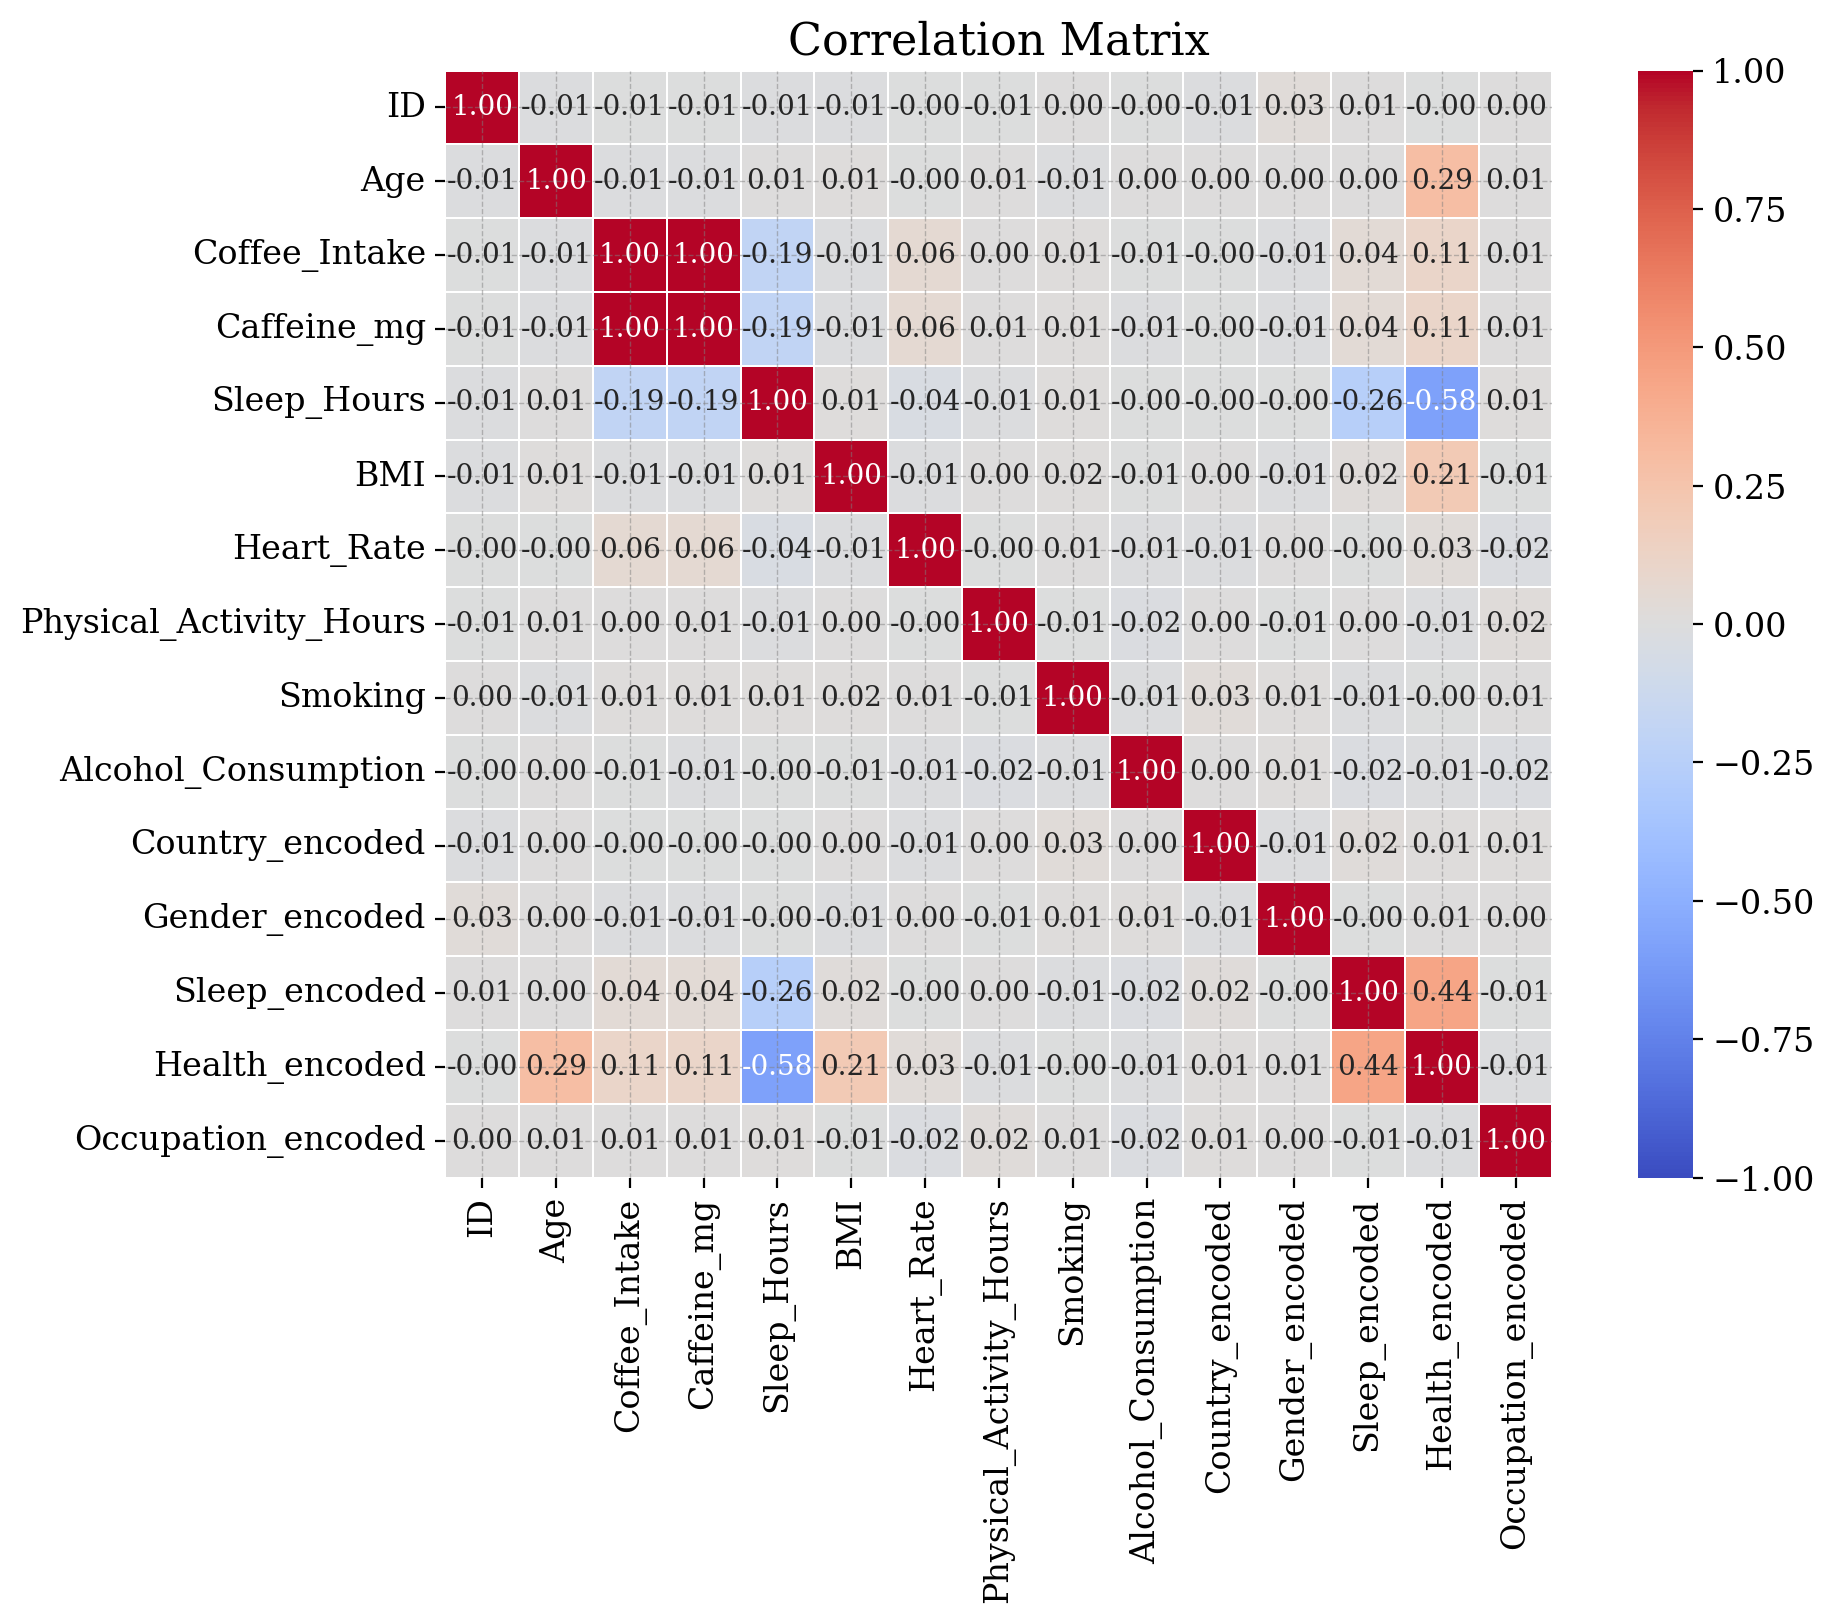

In [177]:
corr = data.corr(numeric_only=True)

# Show heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True, fmt=".2f",
            vmax=1.0, vmin=-1.0,
            linewidths=0.1,
            cmap="coolwarm",
            square=True, cbar=True)
plt.title("Correlation Matrix")
#plt.tight_layout()
plt.show()

Based on the correlation matrix, we can drop the features "Occupation", "Gender", "Country", "Alcohol", "Smoking" and "Physical Activity", since they are fully uncorrelated with all the other other features except themselve.

Furthermore, "Coffee" seems to be equivalent to "Caffeine intake", no surprise, so we can drop one of them as well.

Note: Between "Country" and "Smoking" seems to be a slight correlation, but nothing note worthy.

Main Target: "Health" (aka Classification problem)

In [178]:
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv(file_path)

# # Apply label encoding to categorical column
label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])

data["Country"] = label_encoder.fit_transform(data["Country"])

data["Sleep_Quality"] = label_encoder.fit_transform(data["Sleep_Quality"])

data["Stress_Level"] = label_encoder.fit_transform(data["Stress_Level"])

data["Health_Issues"] = label_encoder.fit_transform(data["Health_Issues"])

data["Occupation"] = label_encoder.fit_transform(data["Occupation"])

# print(data.head())

train_df, val_df = train_test_split(data, test_size=0.3, random_state=42)

In [179]:
# Use the entire features for X_train and X_val

feature_names = train_df.select_dtypes(include=["number"]).drop(columns=["Health_Issues"]).columns

print(feature_names)

X_train = train_df[feature_names].values  # Exclude "Gain" from training features
y_train = train_df["Health_Issues"].values  # Target variable

X_val = val_df[feature_names].values  # Exclude "Gain" from validation features
y_val = val_df["Health_Issues"].values  # Target variable

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')


Best Parameters from RandomizedSearchCV: {'full_dt_regressor__max_depth': 8, 'full_dt_regressor__min_samples_leaf': 4, 'full_dt_regressor__min_samples_split': 6}
Decision Tree regression metrics:
MSE: 0.0093
MAE: 0.0033
SSR: 28.0000
R2-score: 0.9954

Cross-Validated R2-Scores: [0.98528322 0.98528322 0.96729604 0.9983648  1.         1.
 0.96889512 1.         1.         0.98526611]
Average Cross-Validated R2: 0.9890


/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


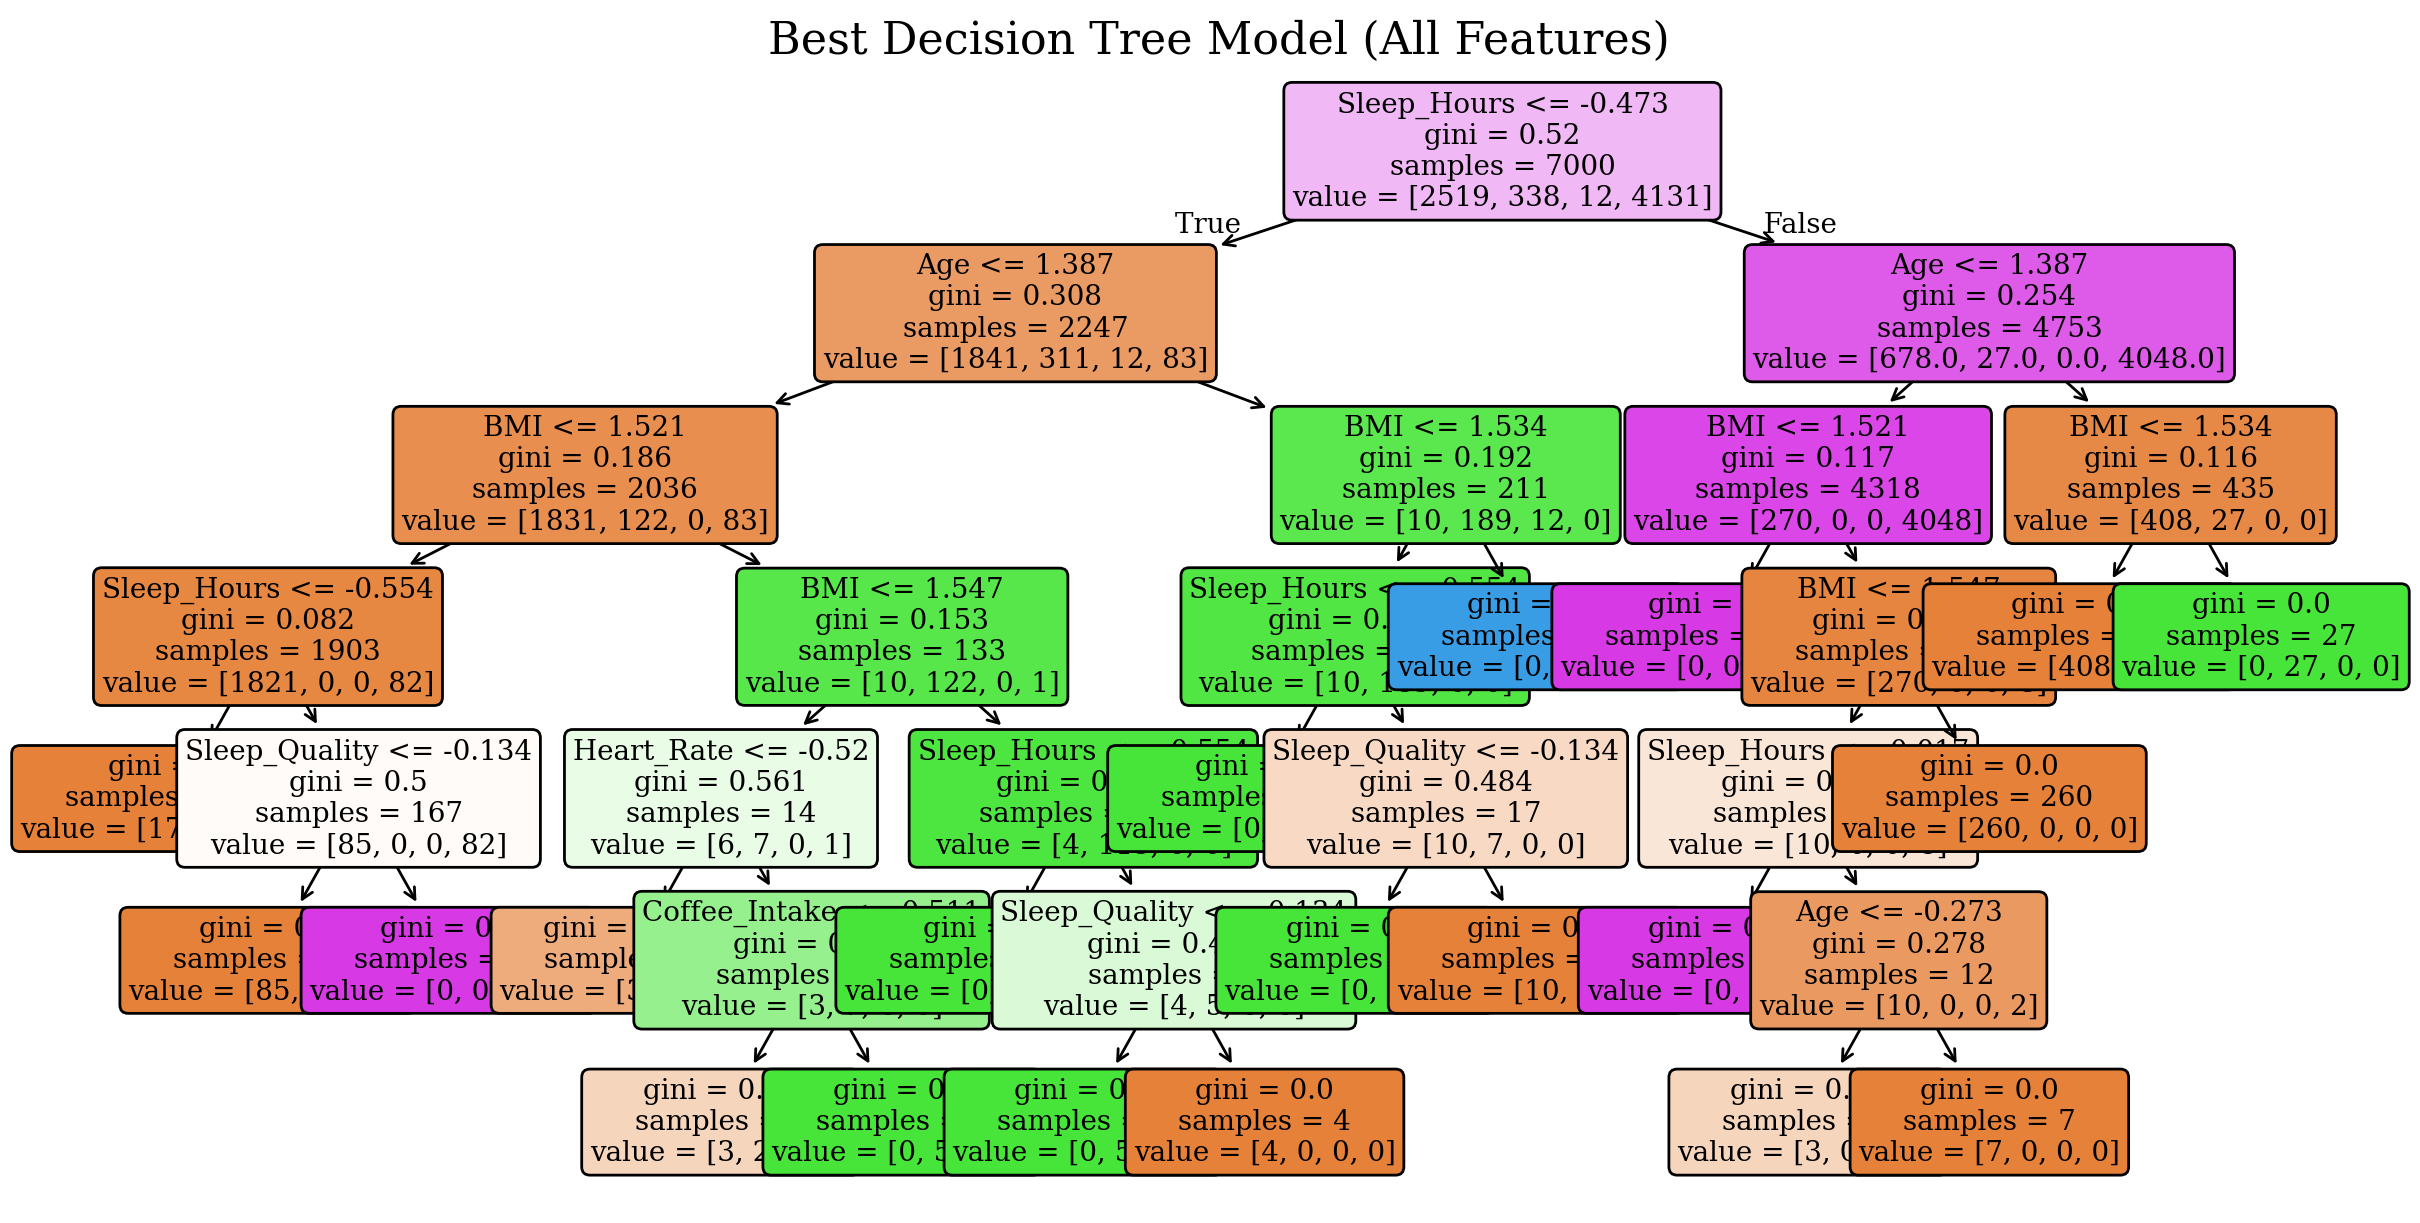

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       1.00      0.99      1.00       125
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00      1810

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Confusion Matrix: 
 [[1060    0    0    0]
 [   1  124    0    0]
 [   0    0    5    0]
 [   3    0    0 1807]]


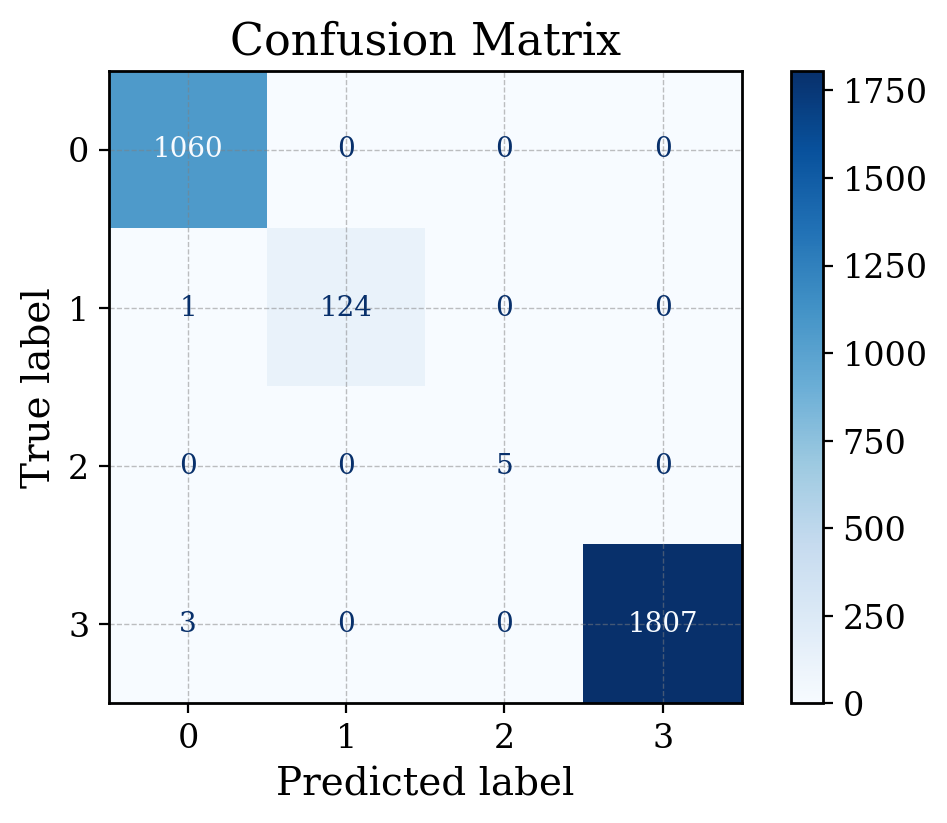

In [180]:
# Build pipeline
new_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('full_dt_regressor', DecisionTreeClassifier(random_state=42))  # Train Decision Tree Regressor
])

# Hyperparameter search space
param_distributions = {
    'full_dt_regressor__max_depth'        : randint(2, 10),
    'full_dt_regressor__min_samples_split': randint(2, 10),
    'full_dt_regressor__min_samples_leaf' : randint(1, 10)
}

# Randomized search with cross-validation
search = RandomizedSearchCV(
    estimator=new_pipeline,   # Use the new pipeline
    param_distributions=param_distributions, # Hyperparameter search space
    n_iter       = 30,    # Number of iterations for random search
    cv           = 10,     # Cross-validation folds
    scoring      = 'r2',  # Scoring metric for evaluation
    n_jobs       = -1,    # Use all available CPU cores
    random_state = 42,    # Random state for reproducibility
)

# Fit search
search.fit(X_train, y_train)

# Best model
best_model = search.best_estimator_

# Predict on validation set
y_pred = best_model.predict(X_val)

# Evaluation metrics
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
ssr = np.sum((y_val - y_pred) ** 2)
r2 = r2_score(y_val, y_pred)

print("Best Parameters from RandomizedSearchCV:", search.best_params_)
print("Decision Tree regression metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"SSR: {ssr:.4f}")
print(f"R2-score: {r2:.4f}")

# Cross-validation with best model
cv_scores = cross_val_score(best_model, X_val, y_val, cv=10, scoring='r2')
print(f"\nCross-Validated R2-Scores: {cv_scores}")
print(f"Average Cross-Validated R2: {cv_scores.mean():.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(best_model.named_steps['full_dt_regressor'], feature_names=train_df[feature_names].columns,
          filled=True,
          rounded=True,
          max_depth=10,  # You can remove or increase this if the tree is shallow
          fontsize=10)
plt.title("Best Decision Tree Model (All Features)")
plt.show()

print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix: \n", cm)
    
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                display_labels=np.unique(y))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()    

/var/folders/rq/sf33k5wx73bcj8m51c786sc80000gn/T/ipykernel_45560/882677415.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(train_df.drop(columns=useless).columns, rotation=90)


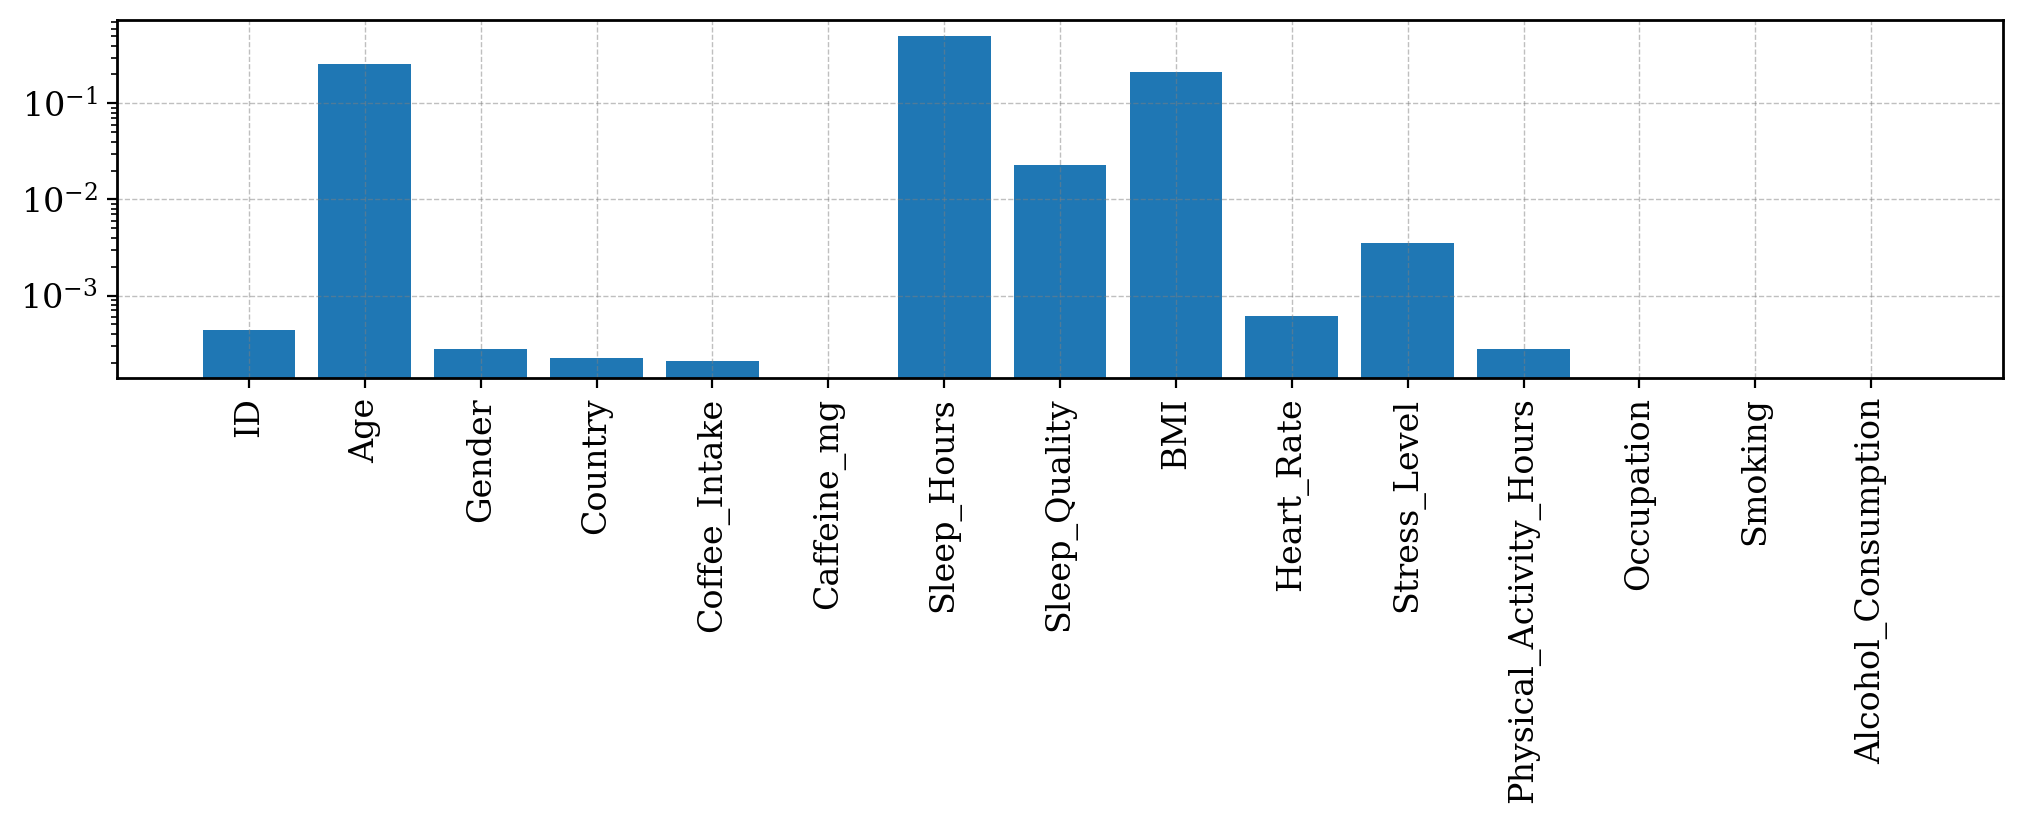

In [181]:
useless = ["Health_Issues"]
X_feat= train_df.drop(columns=useless).values  # Exclude "Gain" from training features
y_feat = train_df["Health_Issues"].values  # Target variable

new_pipeline.fit(X_feat, y_feat)

hmm = new_pipeline.named_steps['full_dt_regressor'].feature_importances_

fig, ax = plt.subplots(figsize = (10,4))

ax.bar(train_df.drop(columns=useless).columns,hmm,log=True)
ax.set_xticklabels(train_df.drop(columns=useless).columns, rotation=90)
plt.show()

/var/folders/rq/sf33k5wx73bcj8m51c786sc80000gn/T/ipykernel_60966/2554165927.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


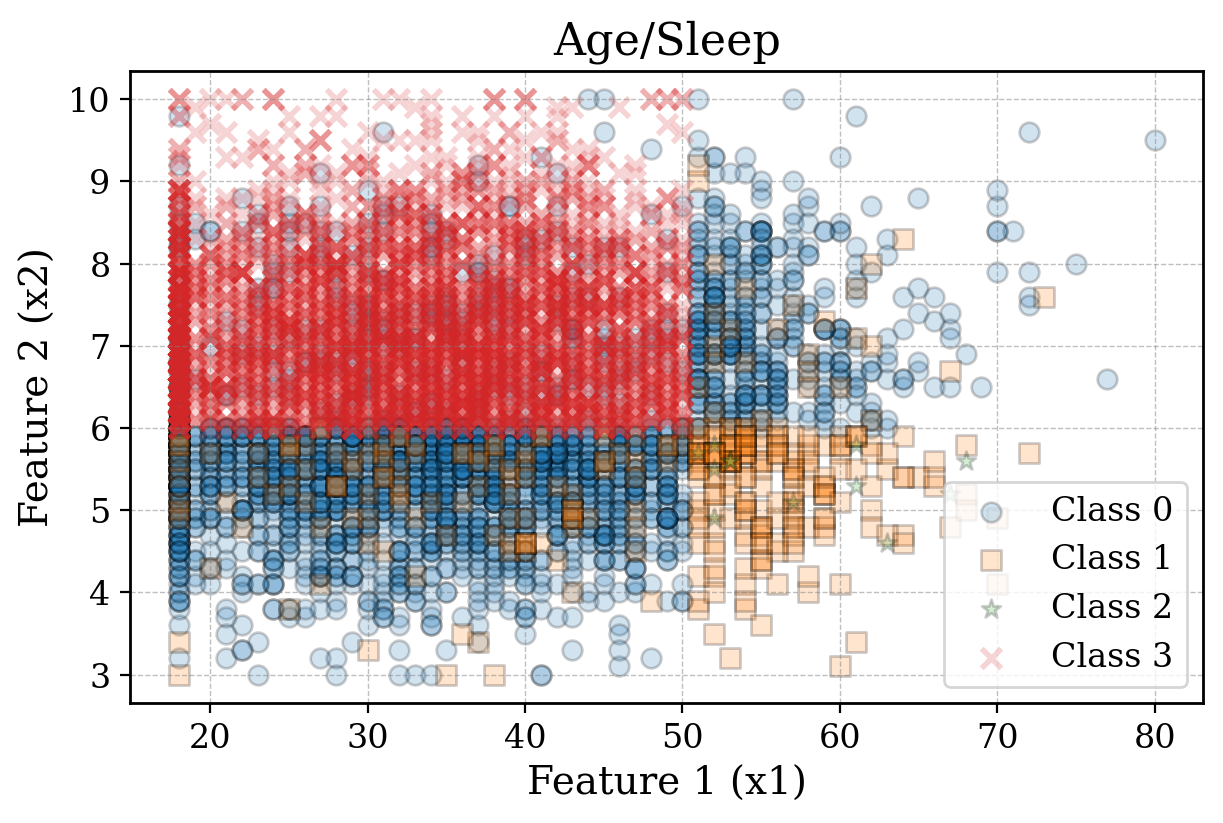

In [20]:
#KNN here for features Age/Sleep_Hours and label Health_Issues

X_train = train_df[["Age","Sleep_Hours"]].to_numpy()
y_train = train_df["Health_Issues"].to_numpy()

X_val = val_df[["Age","Sleep_Hours"]].to_numpy()
y_val = val_df["Health_Issues"].to_numpy()

def visualize_data(x, y, title):
    plt.figure()
    
    classes = np.unique(y) # Get unique class labels

    for i, label in enumerate(classes):
        plt.scatter(
            x[y == label, 0],
            x[y == label, 1],
            marker=markers[i % len(markers)],
            color=colors[i], edgecolor="k" ,
            s=50, alpha=0.2, 
            label=f"Class {label}")

    plt.xlabel("Feature 1 (x1)")
    plt.ylabel("Feature 2 (x2)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_data(X_train,y_train,"Age/Sleep")

/var/folders/rq/sf33k5wx73bcj8m51c786sc80000gn/T/ipykernel_60966/970715754.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


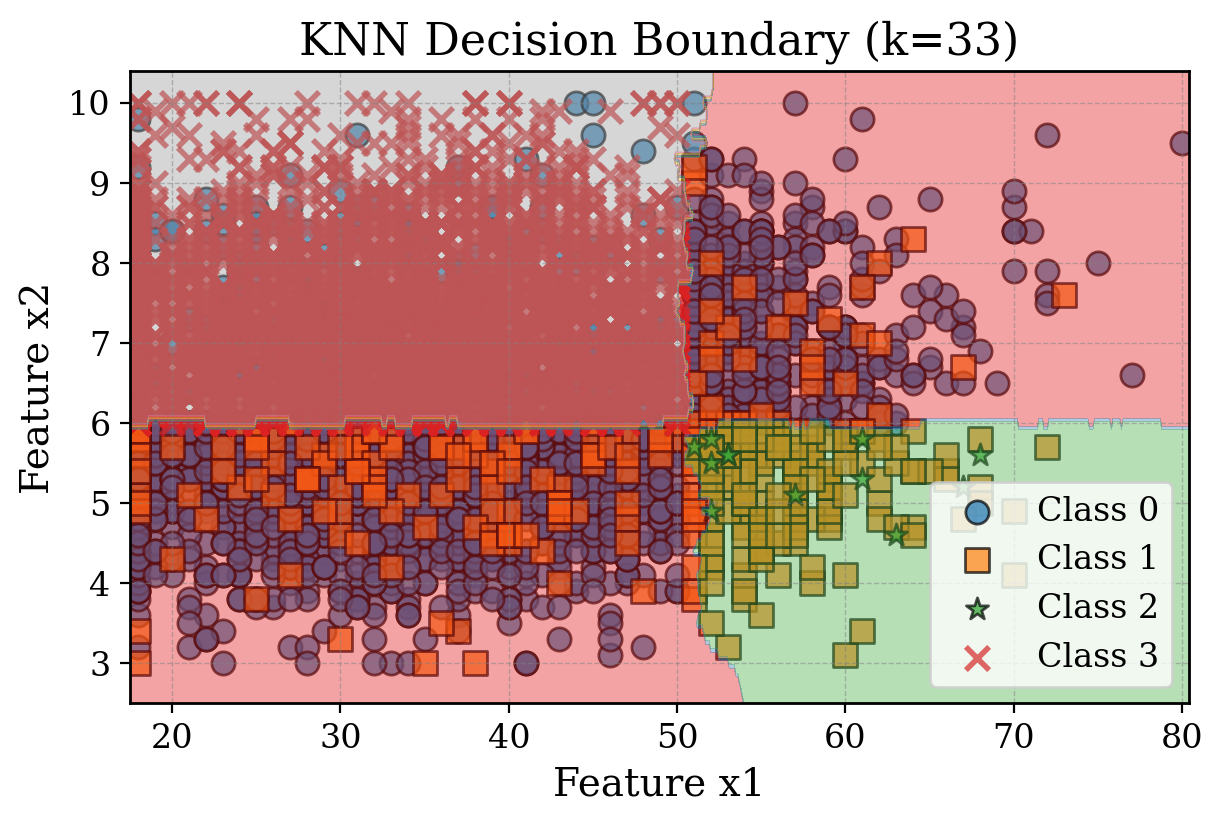

In [23]:
X = X_train.copy()

k = 33

# Train a KNN classifier
knn = Pipeline([
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier(n_neighbors=k))
        ])

knn.fit(X_train, y_train)

# Create meshgrid for decision boundary
h = 0.1  # step size in the mesh
x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on meshgrid
y_pred = knn.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

# Plot decision boundary
plt.figure()

# Plot each class dynamically
for i, class_label in enumerate(np.unique(y_train)):
    plt.scatter(
        X_train[y_train == class_label][:, 0], 
        X_train[y_train == class_label][:, 1],
        color=colors[i % len(colors)],
        marker=markers[i % len(markers)],
        s=70, edgecolor='k', alpha=0.7,
        label=f'Class {class_label}'
    )

plt.contourf(xx, yy, y_pred, alpha=0.4, cmap='Set1')

plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title(f"KNN Decision Boundary (k={k})")
plt.legend()
plt.show()

In [25]:
hmm = list(range(1,101,2))
acc = []
for k in hmm:
    # Train a KNN classifier
    knn = Pipeline([
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=k))
            ])

    knn.fit(X_train, y_train)

    # Predict
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    acc.append(accuracy)

#print(f'Model Accuracy: {accuracy:.2f}')

print(f'Best Model Accuracy: {max(acc):.2f} for k={2*np.argmax(acc)+1}')

Best Model Accuracy: 0.92 for k=33
